## Computational Reactor Physics with Python - Shannon Entropy

Author: OdinhengeT

Date: 2022-08-31

This is the second jupyter notebook ('analysis.ipynb'), where the data generated by the first notebook ('calculations.ipynb') is looked at and analysed. The goal of these notebooks is to look at the convergence of the Shannon entropy and how it is influenced by factors such as geometry, coarseness of entropy mesh and number of neutrons per batch.

---

### Setup

In [1]:
# Imports
import os
import math
import openmc
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Convergence function that will be used to find when functions converge in a statistical way, and not just "by eye"
def convergence_finder(ydata, tol=0.01):
    """Function that finds the first index in ydata after which ydata has converged with the given tolerance, tol.
    Also returns the value of convergence.
    
    Parameters
    ----------
    ydata : ndarray
        Input data.
    tol : float
        Tolerance, in procent of difference between max and min value of ydata.
    """
    y_norm = np.array([(y_i-min(ydata)) / (max(ydata)-min(ydata)) for y_i in ydata])

    idx = -2
    y_delta = 0.0
    while y_delta <= tol:
        y_mean = np.mean(y_norm[idx:])
        idx = idx-1
        y_delta = abs((y_norm[idx] - y_mean))

    conv_idx = len(ydata)+idx+1
    conv_val = np.mean(ydata[conv_idx:])

    return conv_idx, conv_val

### Load Data

In [76]:
# Geometry 1

g1_k_effs = {}
g1_entropies = {}

g1_nBatches = [250]
g1_nParticles = [5000]
g1_mesh_sizes = [4, 8, 16, 32]

for b in g1_nBatches:
    for p in g1_nParticles:
        for m in g1_mesh_sizes:
            
            # Open StatePoint
            sp_path = 'results/geometry_1/batch'+str(b)+'_particles'+str(p)+'_mesh'+str(m)+'/statepoint.'+str(b)+'.h5'
            sp = openmc.StatePoint(sp_path)

            # Store Data
            g1_k_effs[(b, p, m)] = sp.k_generation
            g1_entropies[(b, p, m)] = sp.entropy

In [78]:
# Geometry 2

g2_k_effs = {}
g2_entropies = {}

g2_nBatches = [250]
g2_nParticles = [5000]
g2_mesh_sizes = [4, 8, 16, 32]

for b in g2_nBatches:
    for p in g2_nParticles:
        for m in g2_mesh_sizes:
            
            # Open StatePoint
            sp_path = 'results/geometry_2/batch'+str(b)+'_particles'+str(p)+'_mesh'+str(m)+'/statepoint.'+str(b)+'.h5'
            sp = openmc.StatePoint(sp_path)

            # Store Data
            g2_k_effs[(b, p, m)] = sp.k_generation
            g2_entropies[(b, p, m)] = sp.entropy

### Analysis

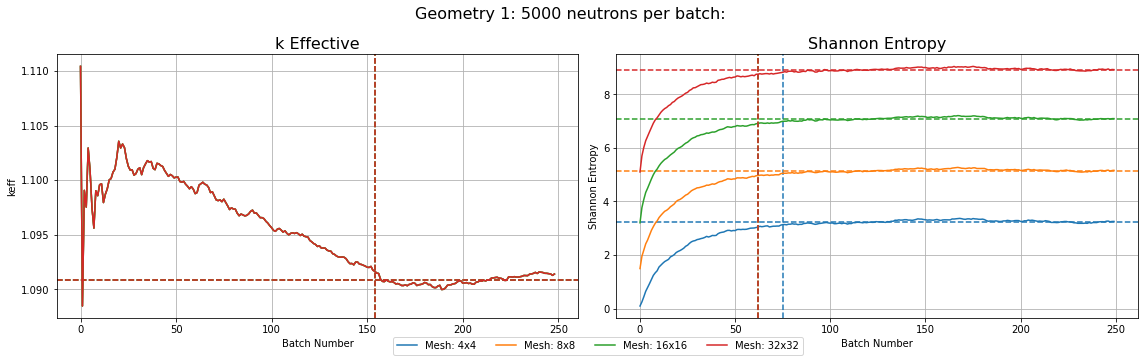

In [77]:
# Geometry 1

cols = {4: 'tab:blue', 8: 'tab:orange', 16: 'tab:green', 32: 'tab:red'}

b = g1_nBatches[0]

for p in g1_nParticles:
    fig = plt.figure(figsize=(16, 5), layout='tight')
    fig.suptitle('Geometry 1: '+str(p)+' neutrons per batch: ', fontsize=16)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('k Effective', fontsize=16)
    ax1.set_xlabel('Batch Number')
    ax1.set_ylabel('keff')
    for m in g1_mesh_sizes:
        # Calculate mean k effective
        k_pBatch = g1_k_effs[(b, p, m)]
        k_mean = np.array([ np.mean(k_pBatch[:i]) for i in range(1, len(k_pBatch)) ])
        # Plot mean k effective after each batch
        ax1.plot(k_mean, color=cols[m], label='Mesh: '+str(m)+'x'+str(m))
        # Convergence lines
        cidx, cval = convergence_finder(k_mean, tol=0.05)
        ax1.axvline(x=cidx+1, ls='--', color=cols[m])
        ax1.axhline(y=cval, ls='--', color=cols[m])

    ax1.grid()

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title('Shannon Entropy', fontsize=16)
    ax2.set_xlabel('Batch Number')
    ax2.set_ylabel('Shannon Entropy')
    for m in g1_mesh_sizes:
        # Plot Shannon entropy for each batch
        ax2.plot(g1_entropies[(b, p, m)], color=cols[m])
        # Convergence lines
        cidx, cval = convergence_finder(g1_entropies[(b, p, m)], tol=0.05)
        ax2.axvline(x=cidx+1, ls='--', color=cols[m])
        ax2.axhline(y=cval, ls='--', color=cols[m])
    ax2.grid()

    fig.legend(bbox_to_anchor=(0.34, 0, 1, 0), loc="lower left", ncol=6)
    fig.savefig('plots/g1_batch'+str(b)+'particles'+str(p)+'.png')
    fig.show()

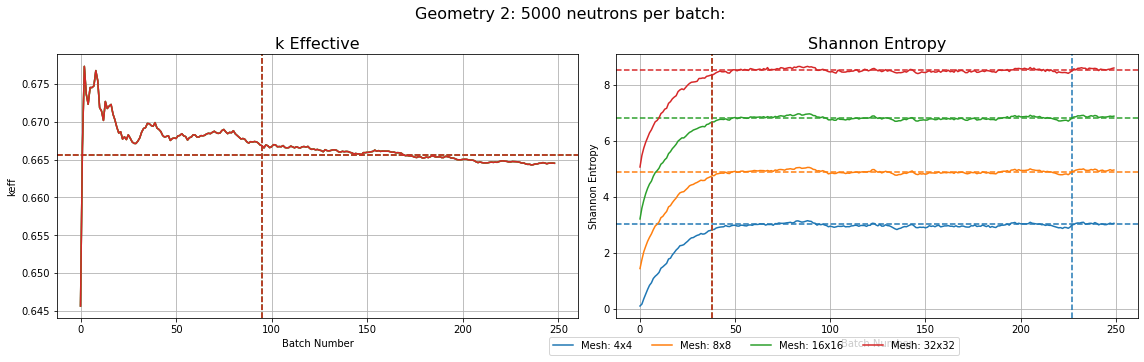

In [80]:
# Geometry 2

cols = {4: 'tab:blue', 8: 'tab:orange', 16: 'tab:green', 32: 'tab:red'}

b = g2_nBatches[0]

for p in g2_nParticles:
    fig = plt.figure(figsize=(16, 5), layout='tight')
    fig.suptitle('Geometry 2: '+str(p)+' neutrons per batch: ', fontsize=16)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('k Effective', fontsize=16)
    ax1.set_xlabel('Batch Number')
    ax1.set_ylabel('keff')
    for m in g2_mesh_sizes:
        # Calculate mean k effective
        k_pBatch = g2_k_effs[(b, p, m)]
        k_mean = np.array([ np.mean(k_pBatch[:i]) for i in range(1, len(k_pBatch)) ])
        # Plot mean k effective after each batch
        ax1.plot(k_mean, color=cols[m], label='Mesh: '+str(m)+'x'+str(m))
        # Convergence lines
        cidx, cval = convergence_finder(k_mean, tol=0.05)
        ax1.axvline(x=cidx+1, ls='--', color=cols[m])
        ax1.axhline(y=cval, ls='--', color=cols[m])

    ax1.grid()

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title('Shannon Entropy', fontsize=16)
    ax2.set_xlabel('Batch Number')
    ax2.set_ylabel('Shannon Entropy')
    for m in g2_mesh_sizes:
        # Plot Shannon entropy for each batch
        ax2.plot(g2_entropies[(b, p, m)], color=cols[m])
        # Convergence lines
        cidx, cval = convergence_finder(g2_entropies[(b, p, m)], tol=0.05)
        ax2.axvline(x=cidx+1, ls='--', color=cols[m])
        ax2.axhline(y=cval, ls='--', color=cols[m])
    ax2.grid()

    fig.legend(bbox_to_anchor=(0.475, 0, 1, 0), loc="lower left", ncol=6)
    fig.savefig('plots/g2_batch'+str(b)+'particles'+str(p)+'.png')
    fig.show()